In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
combined = pd.read_csv("../data/skillshare_2022_starts_views_combined.csv", index_col=0)
combined.head()

,user_uid,create_time,success,is_cancelled,payment_provider_cat_codes,payment_ux_cat_codes,trial_length_offer_cat_codes,sub_utm_channel_cat_codes,sub_utm_source_cat_codes,day-1,...,day-22,day-23,day-24,day-25,day-26,day-27,day-28,day-29,day-30,day-31
0,23692129,2022-01-01 00:00:02,0,True,2,2,0,10,30,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23674285,2022-01-01 00:00:27,0,False,-1,-1,0,2,116,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16119588,2022-01-01 00:01:19,1,False,1,5,0,10,30,347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23693101,2022-01-01 00:01:42,0,False,2,2,0,16,55,1211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23692349,2022-01-01 00:02:04,1,False,2,2,0,16,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
combined.create_time = pd.to_datetime(combined.create_time)
combined.create_time

0        2022-01-01 00:00:02
1        2022-01-01 00:00:27
2        2022-01-01 00:01:19
3        2022-01-01 00:01:42
4        2022-01-01 00:02:04
                 ...        
475443   2022-05-31 23:56:47
475444   2022-05-31 23:56:53
475445   2022-05-31 23:57:46
475446   2022-05-31 23:58:00
475447   2022-05-31 23:59:21
Name: create_time, Length: 475448, dtype: datetime64[ns]

In [15]:
create_time_viz = combined[["create_time", "success"]]\
    .set_index("create_time")\
    .rolling('3d')\
    .mean()\
    .resample('1d')\
    .first()

create_time_viz.reset_index()

,create_time,success
0,2022-01-01,0.000000
1,2022-01-02,0.271280
2,2022-01-03,0.263761
3,2022-01-04,0.263447
4,2022-01-05,0.263811
...,...,...
146,2022-05-27,0.097784
147,2022-05-28,0.089537
148,2022-05-29,0.085635
149,2022-05-30,0.079442


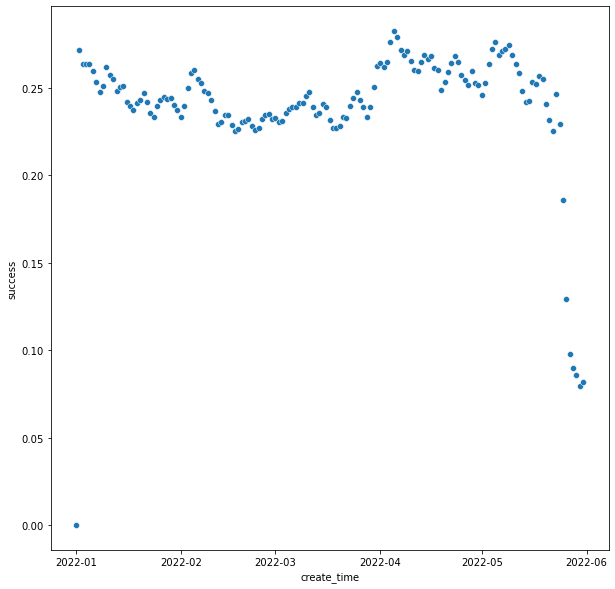

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=create_time_viz.reset_index(),
    x="create_time",
    y="success"
)
plt.show()

In [17]:
res = seasonal_decompose(x=create_time_viz, model='additive')

Text(0.513, 0.95, 'Percentage Churn')

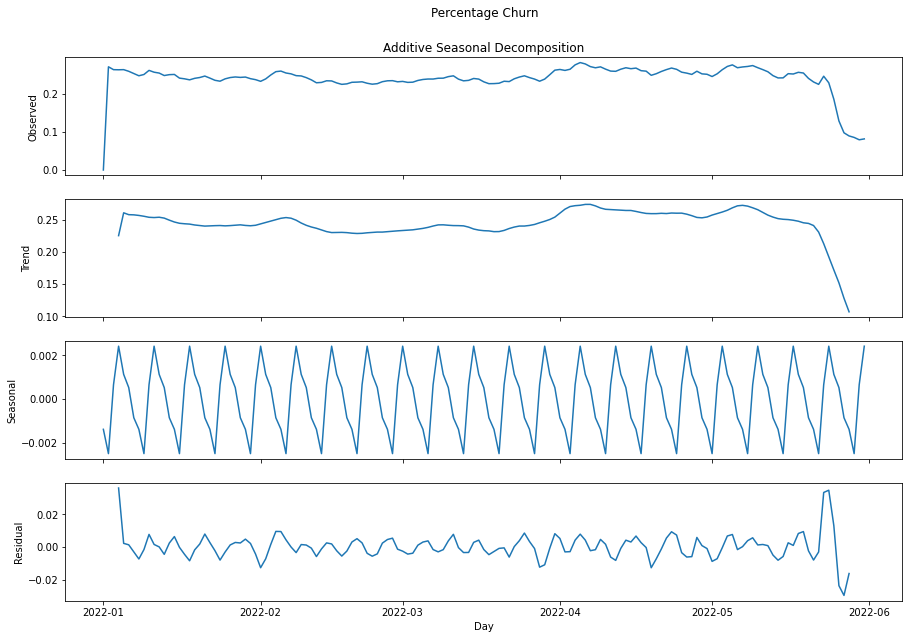

In [18]:
fig, axes = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
axes[0].set_title("Additive Seasonal Decomposition")
axes[0].plot(res.observed)
axes[0].set_ylabel("Observed")
axes[1].plot(res.trend)
axes[1].set_ylabel("Trend")
axes[2].plot(res.seasonal)
axes[2].set_ylabel("Seasonal")
axes[3].plot(res.resid)
axes[3].set_ylabel("Residual")
axes[3].set_xlabel("Day")
fig.suptitle("Percentage Churn", x=0.513, y=0.95)